# Problema 1

In [138]:
import pandas as pd
import re
from collections import Counter

# Cargar el dataset desde un archivo CSV
dataset = pd.read_csv('tw_source.csv', encoding='latin_1', header = None)  # Ajusta el nombre del archivo según corresponda

dataset.columns = ['valor', 'id', 'fecha', 'fuente', 'usuario', 'tweet']
dataset

,valor,id,fecha,fuente,usuario,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


### Encontrar los usuarios mas mencionados

In [139]:
lista_menciones = []
filas_per_at = {}
cont = 0

for tweet in dataset['tweet']:
    ats_in_tweet = [palabra for palabra in tweet.split(' ') if '@' in palabra]
    lista_menciones.extend(ats_in_tweet)

    try:
        ultimo_at = ats_in_tweet[len(ats_in_tweet)- 1]
        filas_per_at.setdefault(ultimo_at, []).append(cont)
    except:
        pass
    finally:
        cont = cont + 1   

In [140]:
contador_menciones = Counter(lista_menciones)
usuarios_mas_mencionados = contador_menciones.most_common(4)[1:]

In [141]:
usuarios_mas_mencionados

[('@mileycyrus', 4310), ('@tommcfly', 3837), ('@ddlovato', 3349)]

### Corpus de los usuarios mas mencionados

In [142]:
corpus_dict = {}

for user, _ in usuarios_mas_mencionados:
    user_tweets = dataset[dataset['tweet'].str.contains(user, regex=False, na=False)]
    
    user_tweets['Length'] = user_tweets['tweet'].apply(len)
    
    corpus_dict[user] = user_tweets[['tweet', 'id', 'fecha', 'Length']]

/var/folders/5k/f74s8p_s2gv7prsj015p5f_m0000gn/T/ipykernel_1894/1417821541.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_tweets['Length'] = user_tweets['tweet'].apply(len)
/var/folders/5k/f74s8p_s2gv7prsj015p5f_m0000gn/T/ipykernel_1894/1417821541.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_tweets['Length'] = user_tweets['tweet'].apply(len)
/var/folders/5k/f74s8p_s2gv7prsj015p5f_m0000gn/T/ipykernel_1894/1417821541.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of

#### Remover stopwords y realizar stemming y lemmatizacion

In [145]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import spacy

In [150]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nlp = spacy.load('en_core_web_sm')
stemmer = SnowballStemmer('english')

def process_text(text):
    tokens = [word for word in text.split() if word.lower() not in stop_words]

    stemmed = [stemmer.stem(word) for word in tokens]
    lemmatized = [token.lemma_ for token in nlp(" ".join(stemmed))]
    
    return lemmatized

for user in corpus_dict:
    corpus_dict[user]['processed_content'] = corpus_dict[user]['tweet'].apply(process_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbookair/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/5k/f74s8p_s2gv7prsj015p5f_m0000gn/T/ipykernel_1894/1232699800.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus_dict[user]['processed_content'] = corpus_dict[user]['tweet'].apply(process_text)


### Wordcloud por cada usuario

In [153]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

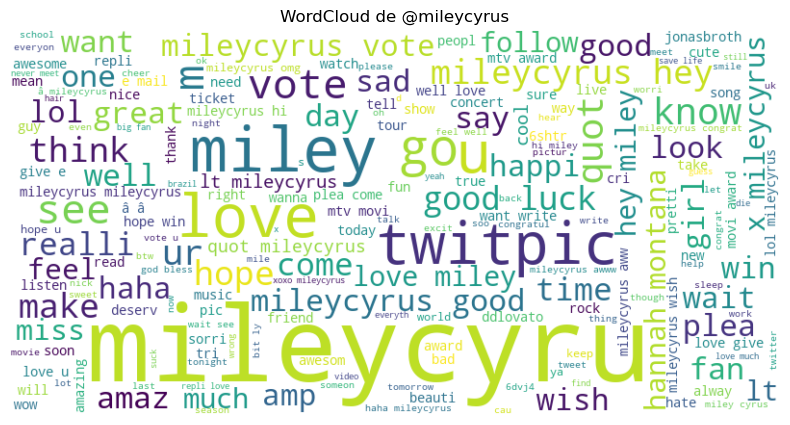

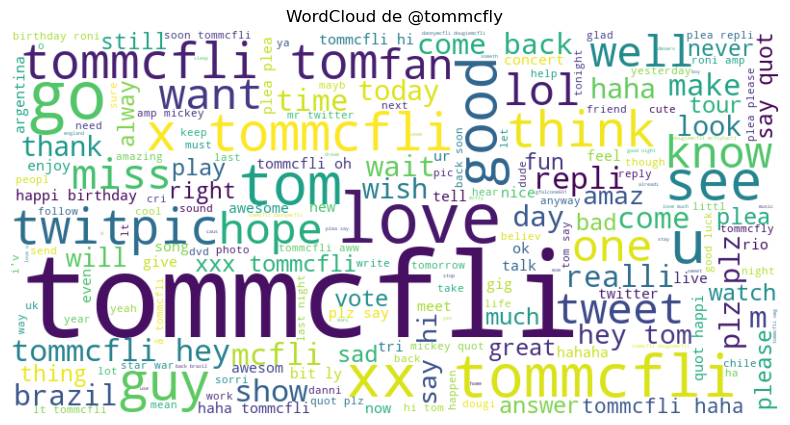

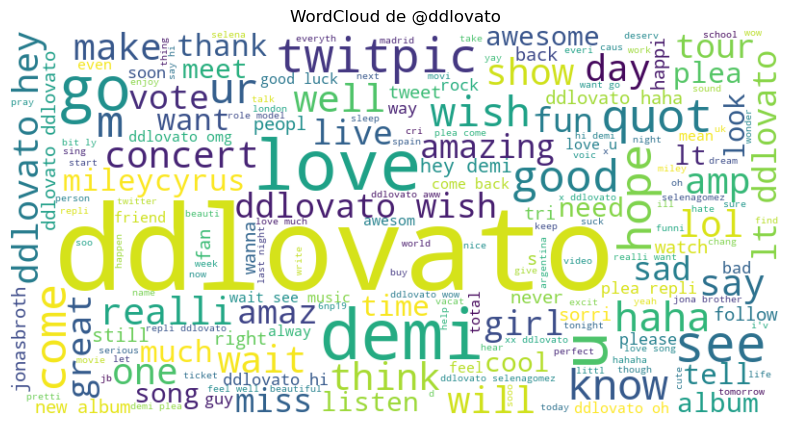

In [154]:
def create_wordcloud(text, user):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"WordCloud de {user}")
    plt.axis('off')
    plt.show()

for user in corpus_dict:
    all_text = [word for sublist in corpus_dict[user]['processed_content'] for word in sublist]
    create_wordcloud(all_text, user)

# Problema 2

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array

2024-09-21 18:48:41.362334: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Data Aumentation e Input Data Flow para Train

In [50]:
data_train_path = 'images/train_set'

#mecanismo de data aumentation para generar variaciones en las imagenes originales
train_data_generator = ImageDataGenerator(
    rescale = 1/255.,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    rotation_range=20,    
    width_shift_range=0.2,  
    height_shift_range=0.2 
)

#carga y configuracion de imagenes de entrada para clasificacion multiclase.
train_data_flow = train_data_generator.flow_from_directory(
    data_train_path,
    target_size = (64,64), 
    batch_size = 30, 
    class_mode = 'categorical' 
)

Found 2955 images belonging to 6 classes.


### Data Aumentation e Input Data Flow para Test

In [51]:
data_test_path = 'images/test_set'

test_data_generator = ImageDataGenerator(
    rescale = 1/255.,
)

#carga y configuracion de imagenes de entrada para clasificacion multiclase.
test_data_flow = test_data_generator.flow_from_directory(
    data_test_path,
    target_size = (64,64), 
    batch_size = 30, 
    class_mode = 'categorical'
)

Found 717 images belonging to 6 classes.


### Definimos red neuronal convolucional

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

### Modelo 1

In [52]:
#Fase convolucional
cnn = Sequential()
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(64, 64, 3))) 
cnn.add(MaxPooling2D(pool_size=(2,2))) 
cnn.add(Flatten())

#Fase neuronal
cnn.add(Dense(units=128, activation='relu')) 
cnn.add(Dense(units=6, activation='softmax')) 

/Users/macbookair/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
cnn.fit(train_data_flow,
           steps_per_epoch=len(train_data_flow),
           epochs=10,
           validation_steps=len(test_data_flow),
           validation_data=test_data_flow
           )

Epoch 1/10


/Users/macbookair/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.3356 - loss: 3.3114

/Users/macbookair/anaconda3/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


99/99 ━━━━━━━━━━━━━━━━━━━━ 53s 499ms/step - accuracy: 0.3369 - loss: 3.2971 - val_accuracy: 0.6625 - val_loss: 0.8679
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


2024-09-21 22:07:35.482389: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/macbookair/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-09-21 22:07:35.491542: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


99/99 ━━━━━━━━━━━━━━━━━━━━ 84s 522ms/step - accuracy: 0.6850 - loss: 0.8892 - val_accuracy: 0.7169 - val_loss: 0.7851
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10


2024-09-21 22:08:59.606081: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-21 22:08:59.612733: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


99/99 ━━━━━━━━━━━━━━━━━━━━ 79s 493ms/step - accuracy: 0.7579 - loss: 0.6616 - val_accuracy: 0.7545 - val_loss: 0.6791
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10


2024-09-21 22:10:18.722263: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-21 22:10:18.729748: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


99/99 ━━━━━━━━━━━━━━━━━━━━ 52s 508ms/step - accuracy: 0.8085 - loss: 0.5226 - val_accuracy: 0.7936 - val_loss: 0.6168
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10


2024-09-21 22:11:11.041577: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-21 22:11:11.048749: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


99/99 ━━━━━━━━━━━━━━━━━━━━ 53s 508ms/step - accuracy: 0.8227 - loss: 0.4792 - val_accuracy: 0.7545 - val_loss: 0.7579
Epoch 10/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


2024-09-21 22:12:03.609432: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-21 22:12:03.616171: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


### Modelo 2

In [80]:
#Fase convolucional
cnn2 = Sequential()
cnn2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64, 64, 3))) 
cnn2.add(MaxPooling2D(pool_size=(2,2))) 
cnn2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2)))

cnn2.add(Flatten())

#Fase neuronal
cnn2.add(Dense(units=130, activation='relu')) 
cnn2.add(Dense(units=6, activation='softmax')) 

/Users/macbookair/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [81]:
cnn2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [82]:
cnn2.fit(train_data_flow,
           steps_per_epoch=20,
           epochs=20,
           validation_steps=100,
           validation_data=test_data_flow
           )

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.3048 - loss: 1.6979

/Users/macbookair/anaconda3/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 952ms/step - accuracy: 0.3077 - loss: 1.6917 - val_accuracy: 0.4156 - val_loss: 1.5052
Epoch 2/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.3333 - loss: 1.6174

2024-09-21 22:21:43.217066: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/macbookair/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 871ms/step - accuracy: 0.4518 - loss: 1.3706 - val_accuracy: 0.5384 - val_loss: 1.3424
Epoch 3/20


2024-09-21 22:21:59.940480: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 806ms/step - accuracy: 0.5267 - loss: 1.1767 - val_accuracy: 0.6234 - val_loss: 1.0332
Epoch 4/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.5333 - loss: 1.1405

2024-09-21 22:22:15.547670: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 902ms/step - accuracy: 0.6530 - loss: 0.9642 - val_accuracy: 0.6067 - val_loss: 1.0136
Epoch 5/20


2024-09-21 22:22:32.835524: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.6699 - loss: 0.9087

2024-09-21 22:22:36.399952: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 653ms/step - accuracy: 0.6695 - loss: 0.9095 - val_accuracy: 0.6736 - val_loss: 0.9068
Epoch 6/20


2024-09-21 22:22:45.450802: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 882ms/step - accuracy: 0.6693 - loss: 0.9209 - val_accuracy: 0.7183 - val_loss: 0.7197
Epoch 7/20


2024-09-21 22:23:04.532285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 873ms/step - accuracy: 0.6603 - loss: 0.7999 - val_accuracy: 0.7392 - val_loss: 0.7851
Epoch 8/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.9333 - loss: 0.3383

2024-09-21 22:23:21.409762: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 856ms/step - accuracy: 0.7332 - loss: 0.7162 - val_accuracy: 0.7782 - val_loss: 0.6532
Epoch 9/20


2024-09-21 22:23:37.789068: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 838ms/step - accuracy: 0.7809 - loss: 0.5991 - val_accuracy: 0.7601 - val_loss: 0.6323
Epoch 10/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.8333 - loss: 0.4076

2024-09-21 22:23:53.925841: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.7939 - loss: 0.5215

2024-09-21 22:23:57.807367: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 635ms/step - accuracy: 0.7927 - loss: 0.5246 - val_accuracy: 0.7252 - val_loss: 0.7979
Epoch 11/20


2024-09-21 22:24:06.186485: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 784ms/step - accuracy: 0.7928 - loss: 0.5506 - val_accuracy: 0.8354 - val_loss: 0.5003
Epoch 12/20


2024-09-21 22:24:23.625412: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 825ms/step - accuracy: 0.8311 - loss: 0.4763 - val_accuracy: 0.8215 - val_loss: 0.6039
Epoch 13/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.7667 - loss: 0.6806

2024-09-21 22:24:39.583320: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 837ms/step - accuracy: 0.7759 - loss: 0.6058 - val_accuracy: 0.7768 - val_loss: 0.6203
Epoch 14/20


2024-09-21 22:24:55.660547: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 823ms/step - accuracy: 0.7973 - loss: 0.4901 - val_accuracy: 0.7559 - val_loss: 0.7903
Epoch 15/20


2024-09-21 22:25:11.593408: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.8584 - loss: 0.4052

2024-09-21 22:25:14.896596: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 577ms/step - accuracy: 0.8575 - loss: 0.4062 - val_accuracy: 0.8006 - val_loss: 0.7004
Epoch 16/20


2024-09-21 22:25:22.749187: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 803ms/step - accuracy: 0.8369 - loss: 0.4245 - val_accuracy: 0.8047 - val_loss: 0.7114
Epoch 17/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 0.9333 - loss: 0.2237

2024-09-21 22:25:40.444702: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8640 - loss: 0.3918 - val_accuracy: 0.8340 - val_loss: 0.5463
Epoch 18/20


2024-09-21 22:26:00.946649: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 969ms/step - accuracy: 0.8567 - loss: 0.3908 - val_accuracy: 0.8466 - val_loss: 0.5957
Epoch 19/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.8667 - loss: 0.3140

2024-09-21 22:26:19.816197: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 800ms/step - accuracy: 0.8800 - loss: 0.3492 - val_accuracy: 0.7936 - val_loss: 0.8710
Epoch 20/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.8000 - loss: 0.4720

2024-09-21 22:26:35.185330: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.8334 - loss: 0.4540

2024-09-21 22:26:38.249752: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 575ms/step - accuracy: 0.8350 - loss: 0.4520 - val_accuracy: 0.8006 - val_loss: 0.7189


2024-09-21 22:26:46.259449: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


### Modelo 3

In [111]:
#Fase convolucional
cnn3 = Sequential()
cnn3.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
cnn3.add(MaxPooling2D(pool_size=(2,2)))
cnn3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2,2)))
cnn3.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2,2)))
cnn3.add(Flatten())

#Fase neuronal
cnn3.add(Dense(units=150, activation='relu')) 
cnn3.add(Dense(units=6, activation='softmax')) 

In [112]:
cnn3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [113]:
cnn3.fit(train_data_flow,
        steps_per_epoch=len(train_data_flow),
        epochs=15,
        validation_steps=len(test_data_flow),
        validation_data=test_data_flow
        )

Epoch 1/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.3123 - loss: 1.5901

/Users/macbookair/anaconda3/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


99/99 ━━━━━━━━━━━━━━━━━━━━ 66s 615ms/step - accuracy: 0.3135 - loss: 1.5878 - val_accuracy: 0.6667 - val_loss: 0.8608
Epoch 2/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/15


/Users/macbookair/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-09-21 22:39:14.335548: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-21 22:39:14.346069: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


99/99 ━━━━━━━━━━━━━━━━━━━━ 56s 532ms/step - accuracy: 0.6491 - loss: 0.8510 - val_accuracy: 0.7252 - val_loss: 0.8132
Epoch 4/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/15


2024-09-21 22:40:09.966045: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-21 22:40:09.973660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


99/99 ━━━━━━━━━━━━━━━━━━━━ 54s 522ms/step - accuracy: 0.7734 - loss: 0.5865 - val_accuracy: 0.8006 - val_loss: 0.5994
Epoch 6/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/15


2024-09-21 22:41:03.647239: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-21 22:41:03.654920: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


99/99 ━━━━━━━━━━━━━━━━━━━━ 53s 520ms/step - accuracy: 0.8119 - loss: 0.5178 - val_accuracy: 0.7517 - val_loss: 0.6280
Epoch 8/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/15


2024-09-21 22:41:56.590910: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-21 22:41:56.599353: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


99/99 ━━━━━━━━━━━━━━━━━━━━ 50s 489ms/step - accuracy: 0.8604 - loss: 0.3678 - val_accuracy: 0.8424 - val_loss: 0.5664
Epoch 10/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/15


2024-09-21 22:42:46.734054: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-21 22:42:46.741138: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


99/99 ━━━━━━━━━━━━━━━━━━━━ 81s 464ms/step - accuracy: 0.8808 - loss: 0.3164 - val_accuracy: 0.9010 - val_loss: 0.3915
Epoch 12/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/15


2024-09-21 22:44:07.549933: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-21 22:44:07.556641: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


99/99 ━━━━━━━━━━━━━━━━━━━━ 51s 481ms/step - accuracy: 0.8913 - loss: 0.3000 - val_accuracy: 0.8298 - val_loss: 0.6575
Epoch 14/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 15/15


2024-09-21 22:44:58.111624: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-21 22:44:58.119285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


99/99 ━━━━━━━━━━━━━━━━━━━━ 49s 477ms/step - accuracy: 0.9076 - loss: 0.2397 - val_accuracy: 0.8787 - val_loss: 0.5164


### Predicciones sobre el problema 2

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

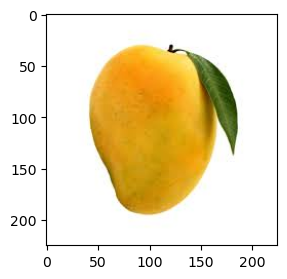

In [135]:
img_predict = cv2.imread("mango.jpeg")
img_predict = cv2.cvtColor(img_predict, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(4,3))
plt.imshow(img_predict)
plt.show()

In [136]:
img = cv2.resize(img_predict, (64, 64))
img = img.astype('float32') / 255
img = np.expand_dims(img, axis=0)

In [116]:
def predict_new_image(img):
    img = cv2.resize(img, (64, 64))
    img = img.astype('float32') / 255
    img = np.expand_dims(img, axis=0)
    prediccion = cnn3.predict(img)
    arr_vals = ['Banana','Carrot','Cucumber','Mango','Potato','Strawberry']
    pred_out = np.argmax(prediccion)
    return arr_vals[pred_out]

In [137]:
predict_new_image(img_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


'Banana'

Resultados con base al Accuracy y la funcion Loss:
- Model 1: Accuracy: 0.8227 Loss: 0.4792
- Model 2: Accuracy: 0.8350 Loss: 0.4520
- Model 3: Accuracy: 0.9076 Loss: 0.2397

Evaluando con predicciones y resultados:

El primero modelo desarrollado alcanzo un accuracy alto y una funcion de perdida no tan baja. Ademas al realizar predicciones con las 6 clases, el modelo no acerto con 2 (mango y banana).

El segundo modelo desarrollado alcanzo un accuracy alto y una funcion de perdida no tan baja. Sin embargo, al realizar predicciones con las 6 clases, el modelo acerto con todas.

El tercer modelo desarrollado alcanzo un accuracy alto y una funcion de perdida baja. Sin embargo, al realizar predicciones con las 6 clases, el modelo no acerto con una clase (mango).

Por lo tanto, el modelo optimo seria el segundo a escoger.